## Importing Modules Required

In [27]:
import torch
import os
import pandas as pd
import numpy as np
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import transforms, datasets,models
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

## Downloading the Data

In [3]:
## Downloading the Data
import urllib.request as request
data_url="https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [5]:
class Config:
    def __init__(self):
        self.ROOT_DATA_DIR ="hymenoptera_data"
        self.EPOCH=10
        self.BATCH_SIZE=32
        self.IMAGE_SIZE=(224,224)
        self.LEARNING_RATE=0.01
        self.DEVICE="cuda" if torch.cuda.is_available() else "cpu"
        print(f"this notebook is using device: {self.DEVICE}")
    def create_dir(self,dir_path):
        os.makedirs(dir_path,exist_ok=True)
        print(f"{dir_path} directory created successfully")


In [6]:
config=Config()
config.create_dir(dir_path=config.ROOT_DATA_DIR)

this notebook is using device: cuda
hymenoptera_data directory created successfully


In [7]:
data_zip_file ="data.zip"
data_zip_file_path = os.path.join(config.ROOT_DATA_DIR,data_zip_file)

request.urlretrieve(data_url,data_zip_file_path)

('hymenoptera_data\\data.zip', <http.client.HTTPMessage at 0x1c0e9e07148>)

## Unziping the Data

In [8]:
from zipfile import ZipFile
def unzip(source:str,dest:str)->None:
    print("Extraction Started")
    with ZipFile(source, "r") as zip_f:
        zip_f.extractall(dest)
    print("Extraction completed")   

In [9]:
unzip(data_zip_file_path,config.ROOT_DATA_DIR)

Extraction Started
Extraction completed


## Creating the DataLoader:

In [8]:
from pathlib import Path

In [9]:
train_path=Path("hymenoptera_data/hymenoptera_data/train")
test_path=Path("hymenoptera_data/hymenoptera_data/val")

#train_path="hymenoptera_data/hymenoptera_data/train"
#test_path="hymenoptera_data/hymenoptera_data/val"

 Wokring on Image

Mean of the each channel of the image<br />

for 28,28 img size:<br />

mean=sum(value of the pixel)/784<br />
std=(data-mean)/std

In [10]:
mean=torch.tensor([0.5,0.5,0.5])
std=torch.tensor([0.5,0.5,0.5])

In [11]:
train_transform=transforms.Compose([
    transforms.Resize(config.IMAGE_SIZE),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)

])

test_transform=transforms.Compose([
    transforms.Resize(config.IMAGE_SIZE),
    #transforms.RandomRotation(degree=20),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)

])

In [13]:
train_data=datasets.ImageFolder(root=train_path,
transform=train_transform)

test_data=datasets.ImageFolder(root=test_path,
transform=test_transform)



In [14]:
train_data.class_to_idx

{'ants': 0, 'bees': 1}

In [15]:
label_map=train_data.class_to_idx

In [16]:
train_data

Dataset ImageFolder
    Number of datapoints: 244
    Root location: hymenoptera_data\hymenoptera_data\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
           )

In [17]:
test_data 

Dataset ImageFolder
    Number of datapoints: 153
    Root location: hymenoptera_data\hymenoptera_data\val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
           )

In [18]:
train_loader=DataLoader(train_data,
                        shuffle=True,
                        batch_size=config.BATCH_SIZE,
)

test_loader=DataLoader(test_data,
                        #shuffle=True,
                        batch_size=config.BATCH_SIZE,
)

In [19]:
data=next(iter(train_loader))

In [20]:
len(data)

2

In [21]:
images,labels=data

In [22]:
images.shape,labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

### Vizualization of  single image

In [23]:
img=images[0]
img.shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

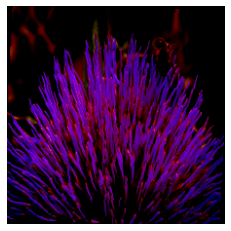

In [24]:
# we need to give the shape as (channel,height,width)
plt.imshow(img.permute(1,2,0))
plt.axis("off")

## Download and use Pre-Trained Model(ALex Net) for Transfer Learning

AlexNet

In [56]:
model=models.alexnet(pretrained=True) ## Imagenet dataset Trained

d:\DataScience\ineuron\dl\TransferLearning-Demo--Pytorch\env\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
d:\DataScience\ineuron\dl\TransferLearning-Demo--Pytorch\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [57]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [58]:
def count_params(model):
    model_params = {"modules": list(),"Parameters": list()}
    total={"trainable":0,"non-trainable":0}
    for name , parameter in model.named_parameters():
        #print(parameter)
        param=parameter.numel() #It returns the length of the input tensor
        #print(param)
        if not parameter.requires_grad:
            total["non-trainable"]+=param
            continue
        model_params["modules"].append(name)
        model_params["Parameters"].append(param)
        total["trainable"]+=param
    df=pd.DataFrame(model_params)
    df=df.style.set_caption(f"Total Parameters: {total}")
    return df

In [59]:
count_params(model)

,modules,Parameters
0,features.0.weight,23232
1,features.0.bias,64
2,features.3.weight,307200
3,features.3.bias,192
4,features.6.weight,663552
5,features.6.bias,384
6,features.8.weight,884736
7,features.8.bias,256
8,features.10.weight,589824
9,features.10.bias,256


#### Freezing all the Layers

In [60]:
print(f"Before freezing {parameter.requires_grad}")
for parameter in model.parameters():
    parameter.requires_grad =False
    print(f"After freezing {parameter.requires_grad}")

Before freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False
After freezing False


In [61]:
model.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [62]:
model.classifier=nn.Sequential(
    nn.Linear(in_features=9216, out_features=100, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5,inplace=False),
    nn.Linear(in_features=100, out_features=2,bias=True)

)

In [63]:
count_params(model)

,modules,Parameters
0,classifier.0.weight,921600
1,classifier.0.bias,100
2,classifier.3.weight,200
3,classifier.3.bias,2


#### Training Loop

In [64]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())

In [65]:
model.to(config.DEVICE)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Drop

In [66]:
for epoch in range(config.EPOCH+10):
    with tqdm(train_loader) as tqdm_epoch:
        for images, labels in tqdm_epoch:
            tqdm_epoch.set_description(f"Epoch: {epoch+1}/{config.EPOCH+10}")
            
            images=images.to(config.DEVICE)
            labels=labels.to(config.DEVICE)

            # Forward pass
            output=model(images)
            loss=criterion(output,labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #Setting the postfix
            tqdm_epoch.set_postfix(loss=loss.item())

Epoch: 20/20: 100%|██████████| 8/8 [00:02<00:00,  2.90it/s, loss=0.0406]  


#### Save the Model

In [68]:
os.makedirs("model_dir",exist_ok=True)
model.file_path=os.path.join("model_dir","CNN_ALEXNET.pth")
torch.save(model,model.file_path)

#### Evaluate our Model

In [89]:
pred=np.array([])
target=np.array([])

with torch.no_grad():
    for batch,data in enumerate(test_loader):
        images=data[0].to(config.DEVICE)
        labels=data[1].to(config.DEVICE)

        y_pred=model(images)

        y_pred_=torch.argmax(y_pred,1).cpu().numpy()
        #labels_=torch.Tensor(labels).cpu().numpy()
        pred=np.concatenate((pred,y_pred_))

        
        traget=np.concatenate((target,labels.cpu().numpy())) 

In [90]:
cm=confusion_matrix(target,pred)

ValueError: Found input variables with inconsistent numbers of samples: [0, 153]

In [100]:
next(iter(test_loader))[0].shape

torch.Size([32, 3, 224, 224])

In [102]:
next(iter(test_loader))[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
for img, labels in test_loader:
    print(images[0])
    print(labels[0])


In [91]:
pred.shape

(153,)

In [103]:
target

array([], dtype=float64)